In [1]:
#Find the directory in which you are working to get the data 
pwd

'/mnt/c/Users/hp/venv/Untitled Folder'

In [28]:
#import data
import pandas as pd
data = pd.read_csv("/mnt/c/Users/hp/venv/iris.csv")
data.sample(5)
features=data[data.columns[1:5]]
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [51]:
#Normalize data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features=MinMaxScaler().fit_transform(features[data.columns[1:5]])
# Using PCA summarize each observation as coordinates for two principal components
# or convert 5-dimensional feature values into 2-dimensional coordinates
pca=PCA(n_components=2).fit(scaled_features)
features_2d=pca.transform(scaled_features)
features_2d[:5]

array([[-0.63036125,  0.11155626],
       [-0.62354631, -0.1003132 ],
       [-0.6697928 , -0.04722006],
       [-0.65463305, -0.09879127],
       [-0.64826327,  0.13755769]])

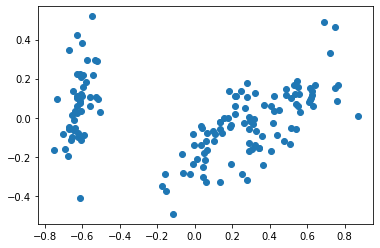

In [30]:
#Visualize 2-dimensional features
from matplotlib import pyplot as plt

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.show()

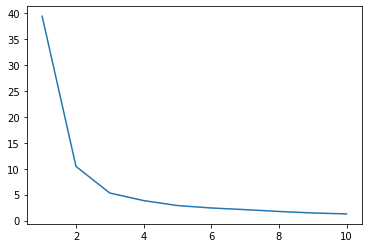

In [31]:
# Find clusters by creating 10 models with 1 to 10 clusters
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.show()

In [48]:
#The above graph shows 3 clusters 
#using them and creating model
model=KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=1000)
km_model=model.fit_predict(features.values)
km_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

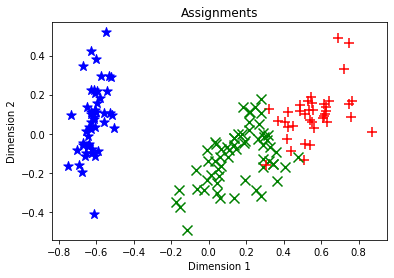

In [49]:
#plot clusters and visualize them on scatter plot
def plot_clusters(samples,clusters):
    col={0:'blue',1:'green',2:'red'}
    marker={0:'*',1:'x',2:'+'}
    color=[col[x] for x in clusters]
    mark=[marker[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0],samples[sample][1],color=color[sample],marker=mark[sample],s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')    
    plt.show()    
plot_clusters(features_2d,km_model)    